# Functions for the different Fourier-Bessel transformations

In [1]:
#include "FF_WS_Transforms.h"
#include "FormFactor_1D.h"
#include "FormFactor_2D.h"
#include "WoodsSaxon_1D.h"
#include "WoodsSaxon_2D.h"

### Parameters for all of the functions used below

In [2]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7, a = 0.535;
double q_min = 0, q_max = 5, t_min = 0, t_max = 0.1;
double bins = 1000, r_min = 0, r_max = 15;
double qy_min = 0, qy_max = 0.5, qx_min = 0, qx_max = 0.5, qx_prime_min = 0, qx_prime_max = 0.5;
double ty_min = 0, ty_max = 0.25, tx_min = 0, tx_max = 0.25, tx_prime_min = 0, tx_prime_max = 0.25;
double x_min= 0, x_max = 15, y_min = 0, y_max = 15;

// Parameters to mess with
double phi_min = 0, phi_max = 2*pi;

// Initialize constructors
FF_WS_Transforms transformer(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,bins,r_min,r_max);
WoodsSaxon_1D ws_init_1D(Vo,R,a,r_min,r_max,bins,t_min,t_max);
WoodsSaxon_2D ws_init_2D(Vo,R,a,x_min,x_max,y_min,y_max,bins,tx_min,tx_max,ty_min,ty_max);
FormFactor_1D ff_init_1D(A, Vo, R, a0, q_min, q_max, t_min, t_max, phi_min, phi_max);
FormFactor_2D ff_init_2D(A,Vo,R,a0,qy_min,qy_max,qx_min,qx_max,tx_min,tx_max,ty_min,ty_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max);

Warning in <TROOT::Append>: Replacing existing TH1: hankelTransformWS (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hankelTransformFF (Potential memory leak).


In [3]:
TF1 *ff_transform_to_ws = transformer.getFFtransform();
    ff_transform_to_ws->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    ff_transform_to_ws->GetXaxis()->SetTitle("r [fm]");
    ff_transform_to_ws->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


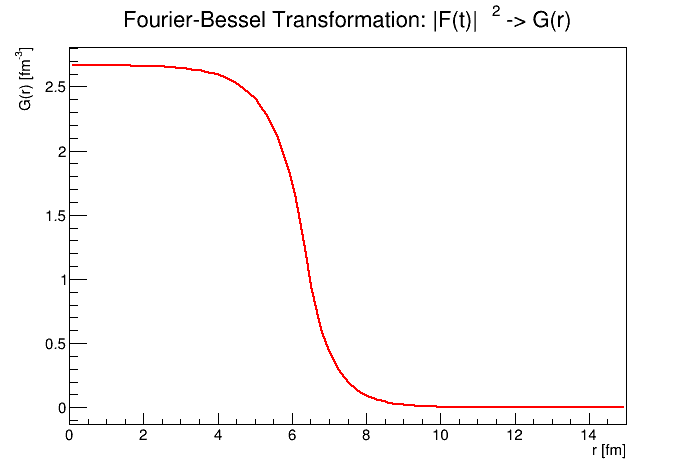

In [4]:
c1->Draw();

In [5]:
TH1D *ff_transform_hist = transformer.getTransformFFhist();
    ff_transform_hist->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    ff_transform_hist->GetXaxis()->SetTitle("r [fm]");
    ff_transform_hist->Draw();

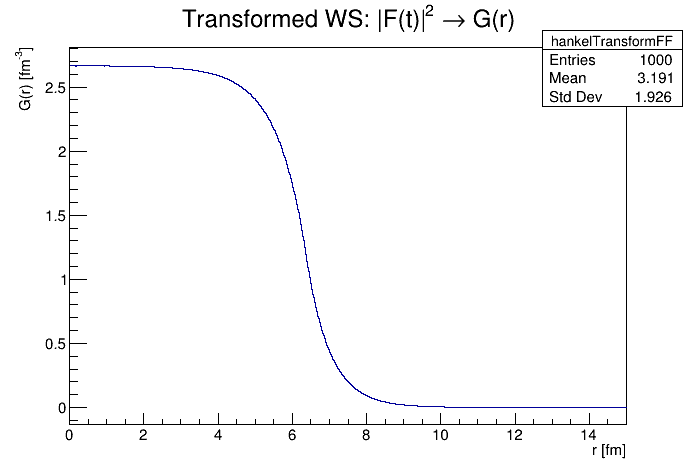

In [6]:
c1->Draw();

In [7]:
TH2D *ff_transform_2D = ff_init_2D.getFFtransform_2D();
    ff_transform_2D->GetZaxis()->SetTitle("G(x,y) [fm^{-3}]");
    ff_transform_2D->GetXaxis()->SetTitle("x [fm]");
    ff_transform_2D->GetYaxis()->SetTitle("y [fm]");
    ff_transform_2D->ProjectionY()->Draw();

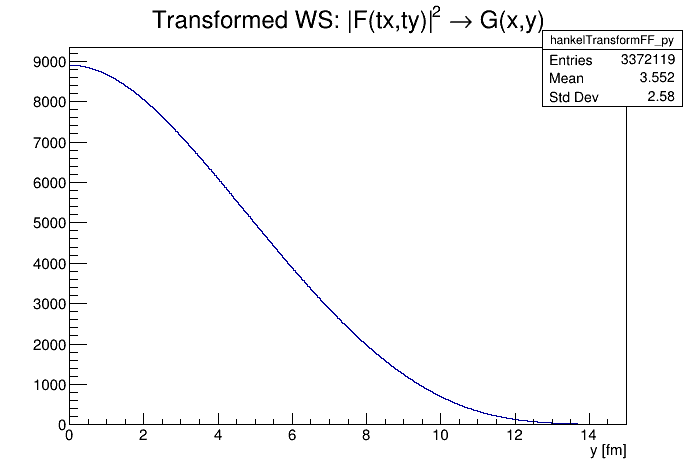

In [8]:
c1->Draw();

In [9]:
TH2D *ws_transform_hist_2D = ws_init_2D.getWStransformHist();
    ws_transform_hist_2D->GetZaxis()->SetTitle("|F(tx,ty)|^{2}");
    ws_transform_hist_2D->GetXaxis()->SetTitle("tx [GeV^{2}]");
    ws_transform_hist_2D->GetXaxis()->SetTitle("ty [GeV^{2}]");
    ws_transform_hist_2D->ProjectionY()->Draw();
gPad->SetLogy(1);

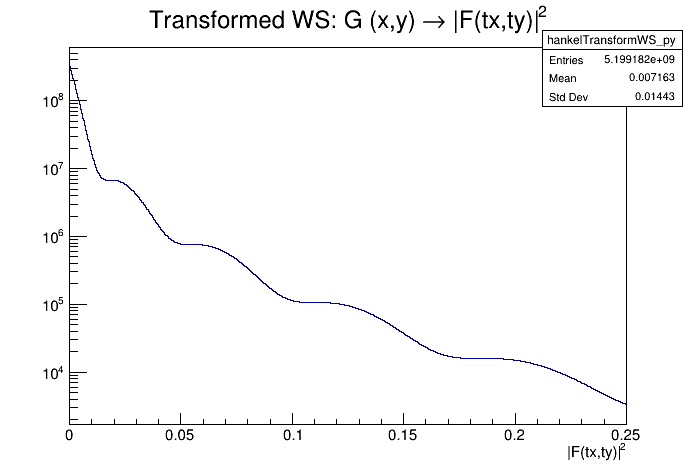

In [10]:
c1->Draw();

In [11]:
TF1 *ws_transform_to_ff = ws_init_1D.getWStransform();
    ws_transform_to_ff->GetYaxis()->SetTitle("|F(q)|^{2}");
    ws_transform_to_ff->GetXaxis()->SetTitle("q [GeV]");
    ws_transform_to_ff->Draw();

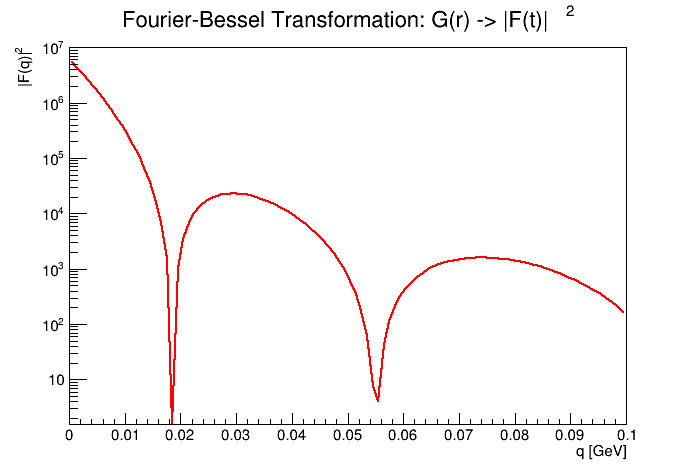

In [12]:
c1->Draw();

In [13]:
TH1D *ws_transform_hist_1D = ws_init_1D.getWStransformHist();
    ws_transform_hist_1D->GetYaxis()->SetTitle("|F(t)|^{2}");
    ws_transform_hist_1D->GetXaxis()->SetTitle("t [GeV^{2}]");
    ws_transform_hist_1D->Draw();

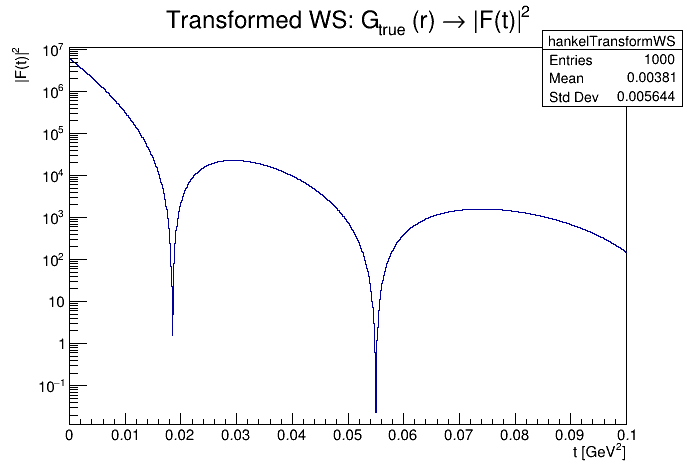

In [14]:
c1->Draw();

## Test the transformer function in the header file that takes TF1's

In [4]:
TF1 *ff_transform = transformer.getFFtransform();
    ff_transform->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    ff_transform->GetXaxis()->SetTitle("r [fm]");
    ff_transform->SetLineColor(kBlack);
    ff_transform->SetLineStyle(2);
    ff_transform->Draw();
TF1 *ff_t2 = ff_init_1D.getFormFactort2_1D();
TF1 *transformedTF1 = transformer.transformTF1(ff_transform, r_min, r_max,q_min,q_max);
    transformedTF1->SetLineColor(kRed);
    transformedTF1->SetLineStyle(3);
    transformedTF1->GetYaxis()->SetRangeUser(1e-20,1e2);
    transformedTF1->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    transformedTF1->GetXaxis()->SetTitle("r [fm]");
    transformedTF1->Draw("same");

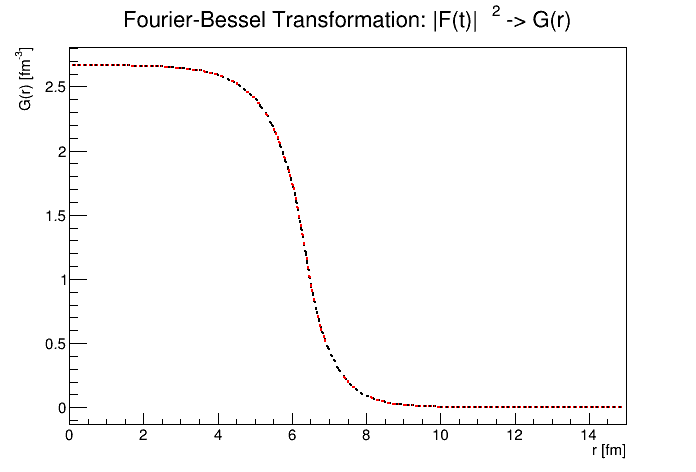

In [5]:
c1->Draw();

In [ ]:
TF1 *transformedWS = ws_init_1D.getWStransform();
double wsIntegral = transformedWS->Integral(transformedWS->GetXmin(), transformedWS->GetXmax());
TF1 *normalizedWS = new TF1("Compare Form Factors", [transformedWS, wsIntegral](double *x, double *par) 
    {
        return transformedWS->Eval(x[0]) / wsIntegral;
    }, transformedWS->GetXmin(), transformedWS->GetXmax(), 0);
    normalizedWS->SetLineColor(kBlack);
    normalizedWS->SetLineStyle(2);
    normalizedWS->GetYaxis()->SetTitle("|F(t)|^{2}");
    normalizedWS->GetXaxis()->SetTitle("t [GeV^{2}]");
    normalizedWS->Draw();

TF1 *trueFF = ff_init_1D.getFormFactort2_1D();
double ffIntegral = trueFF->Integral(trueFF->GetXmin(), trueFF->GetXmax());
TF1 *normalizedFF = new TF1("Compare Form Factors", [trueFF, ffIntegral](double *x, double *par) 
    {
        return trueFF->Eval(x[0]) / ffIntegral;
    }, trueFF->GetXmin(), trueFF->GetXmax(), 0);
    normalizedFF->SetLineColor(kRed);
    normalizedFF->SetLineStyle(3);
    normalizedFF->GetYaxis()->SetTitle("|F(t)|^{2}");
    normalizedFF->GetXaxis()->SetTitle("t [GeV^{2}]");
    normalizedFF->Draw("same");
gPad->SetLofy(1);

In [ ]:
c1->Draw();

In [8]:
TF1 *trueWS = ws_init_1D.getWoodsSaxon1D();
    trueWS->SetLineColor(kBlack);  
    trueWS->SetLineStyle(2);    
    trueWS->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
    trueWS->GetXaxis()->SetTitle("r [fm]");
    trueWS->Draw();
TF1 *transformedFF = transformer.getFFtransform();
    transformedFF->SetLineColor(kRed);  
    transformedFF->SetLineStyle(3);    
    transformedFF->GetYaxis()->SetTitle("G(r) [fm^{-3}]");
        transformedFF->GetXaxis()->SetTitle("r [fm]");
        transformedFF->Draw("same");

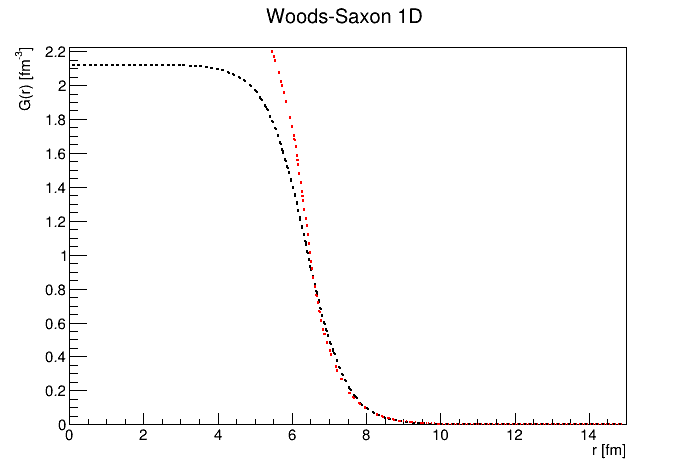

In [9]:
c1->Draw();